In [172]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/air-quality-time-series-data-uci/AirQualityUCI.xlsx


# Importing Libraries

In [173]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn import preprocessing 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from category_encoders import *
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import  confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.linear_model import LinearRegression

In [174]:
# !pip install openpyxl

# Loading Data

In [175]:
df=pd.read_excel('../input/air-quality-time-series-data-uci/AirQualityUCI.xlsx')

df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [176]:
#getting the names of columns
df.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')

In [177]:
#getting the shape of the dataset
df.shape

(9357, 15)

In [178]:
df.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [179]:
df.info()
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   NMHC(GT)       9357 non-null   int64         
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   float64       
 7   NOx(GT)        9357 non-null   float64       
 8   PT08.S3(NOx)   9357 non-null   float64       
 9   NO2(GT)        9357 non-null   float64       
 10  PT08.S4(NO2)   9357 non-null   float64       
 11  PT08.S5(O3)    9357 non-null   float64       
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH             9357 non-null   float64       
dtypes: datetime64[ns](1),

Date             datetime64[ns]
Time                     object
CO(GT)                  float64
PT08.S1(CO)             float64
NMHC(GT)                  int64
C6H6(GT)                float64
PT08.S2(NMHC)           float64
NOx(GT)                 float64
PT08.S3(NOx)            float64
NO2(GT)                 float64
PT08.S4(NO2)            float64
PT08.S5(O3)             float64
T                       float64
RH                      float64
AH                      float64
dtype: object

In [180]:
# Replace -200 with actual NumPy NaN (doesn't break numeric dtype)
df.replace(-200, np.nan, inplace=True)


In [181]:
# Combine Date & Time into a single datetime column
df['Datetime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'].astype(str), dayfirst=True)

# Sort chronologically
df.sort_values('Datetime', inplace=True)

# Drop original Date, Time columns
df.drop(columns=['Date', 'Time'], inplace=True)

In [182]:
df.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Datetime
0,2.6,1360.00,150.0,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754,2004-03-10 18:00:00
1,2.0,1292.25,112.0,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487,2004-03-10 19:00:00
2,2.2,1402.00,88.0,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239,2004-03-10 20:00:00
3,2.2,1375.50,80.0,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713,2004-03-10 21:00:00
4,1.6,1272.25,51.0,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794,2004-03-10 22:00:00


# 3️⃣ Time Series Structure Check

In [183]:

# Make datetime index
df.set_index('Datetime', inplace=True)

# Check if regular frequency
print(df.index.inferred_freq)

# # Resample hourly mean (if needed)
df_interp = df.resample('H').mean()

df_interp.head()

H


,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Datetime,,,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.00,150.0,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
2004-03-10 19:00:00,2.0,1292.25,112.0,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2004-03-10 20:00:00,2.2,1402.00,88.0,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
2004-03-10 21:00:00,2.2,1375.50,80.0,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
2004-03-10 22:00:00,1.6,1272.25,51.0,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [197]:
df_interp.columns

Index(['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
       'T', 'RH', 'AH'],
      dtype='object')

In [184]:
df_interp.columns = df_hourly.columns.str.strip()

<AxesSubplot:title={'center':'CO Levels Over Time'}, xlabel='Datetime'>

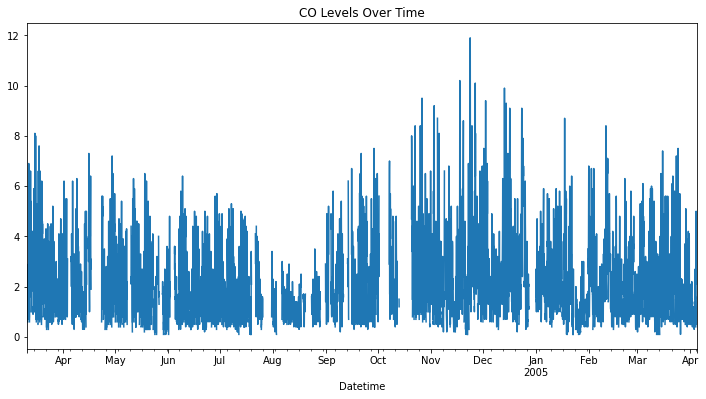

In [185]:
# Plot PM2.5 or CO trends
df_interp['CO(GT)'].plot(figsize=(12,6), title='CO Levels Over Time')

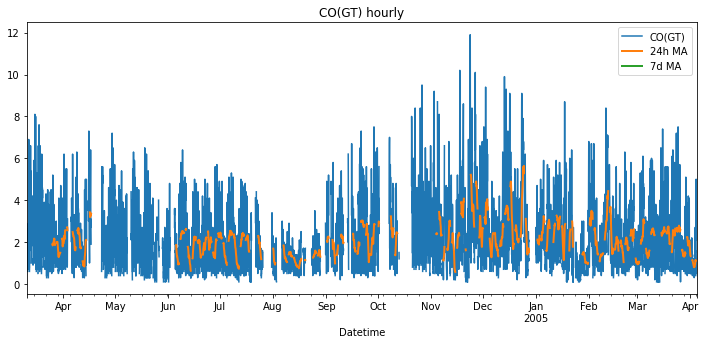

In [186]:
target = 'CO(GT)'  # change if needed
assert target in df_interp.columns, f"{target} not found in columns."

# Plot level + rolling means
ax = df_interp[target].plot(figsize=(12,5), title=f'{target} hourly')
df_interp[target].rolling(24).mean().plot(ax=ax, linewidth=2)
df_interp[target].rolling(24*7).mean().plot(ax=ax, linewidth=2)
plt.legend([target, '24h MA', '7d MA'])
plt.show()

# Daily aggregation & seasonality views

In [187]:
# df_daily = df_interp.resample('D').mean()

# # Daily plot
# df_daily[target].plot(figsize=(12,4), title=f'{target} daily mean')
# plt.show()

# # Hour-of-day and Month-of-year seasonality heatmap
# tmp = df_interp.copy()
# tmp['hour'] = tmp.index.hour
# tmp['month'] = tmp.index.month
# pivot = tmp.pivot_table(index='hour', columns='month', values=target, aggfunc='mean')

# import seaborn as sns
# plt.figure(figsize=(10,5))
# sns.heatmap(pivot, annot=False)
# plt.title(f'{target}: Hour (rows) × Month (cols)')
# plt.show()


In [188]:
# # Winsorize at 1st–99th percentiles to dampen sensor spikes
# low, high = df_interp[target].quantile([0.01, 0.99])
# df_sanit = df_interp.copy()
# df_sanit[target] = df_sanit[target].clip(lower=low, upper=high)

# # Compare pre/post
# df_interp[target].plot(figsize=(12,4), alpha=0.6)
# df_sanit[target].plot(alpha=0.8)
# plt.title(f'{target}: original vs clipped (1–99%)')
# plt.legend(['original','clipped'])
# plt.show()


# Stationarity check (ADF) & ACF/PACF

In [189]:
# from statsmodels.tsa.stattools import adfuller
# from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# series = df_sanit[target].dropna()

# # ADF test
# adf = adfuller(series, autolag='AIC')
# print(f'ADF stat: {adf[0]:.3f}, p-value: {adf[1]:.3f}')

# # ACF/PACF (on daily mean often clearer)
# series_d = df_daily[target].dropna()
# fig1 = plot_acf(series_d, lags=40)
# fig2 = plot_pacf(series_d, lags=40)
# plt.show()


# Baselines (naive & seasonal naive)

In [190]:
# # Train/validation split
# cut = int(len(series) * 0.8)
# train, test = series.iloc[:cut], series.iloc[cut:]

# # Naive forecast
# yhat_naive = pd.Series(train.iloc[-1], index=test.index)

# # Seasonal naive forecast (e.g., daily seasonality for hourly data)
# seasonal_period = 24
# yhat_snaive = series.shift(seasonal_period).iloc[cut:]
# yhat_snaive = yhat_snaive.dropna()
# test_snaive = test.loc[yhat_snaive.index]  # Align

# # Metrics
# def mae(a, b):
#     return np.mean(np.abs(a - b))

# def mape(a, b):
#     mask = a != 0
#     return np.mean(np.abs((a[mask] - b[mask]) / a[mask])) * 100

# print("Naive  MAE:", mae(test, yhat_naive))
# print("Naive  MAPE:", mape(test, yhat_naive))
# print("SNaive MAE:", mae(test_snaive, yhat_snaive))
# print("SNaive MAPE:", mape(test_snaive, yhat_snaive))


# SARIMA (univariate statistical forecasting)

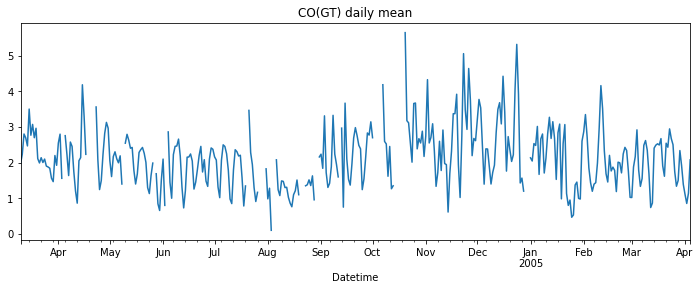

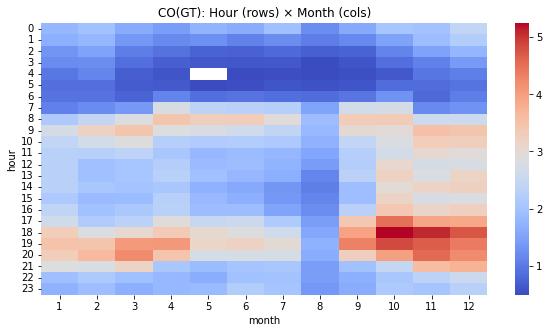

In [191]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX

# === 1. Daily aggregation ===
df_daily = df_interp.resample('D').mean()

# Daily plot
df_daily[target].plot(figsize=(12, 4), title=f'{target} daily mean')
plt.show()

# === 2. Hour-of-day × Month-of-year seasonality ===
tmp = df_interp.copy()
tmp['hour'] = tmp.index.hour
tmp['month'] = tmp.index.month
pivot = tmp.pivot_table(index='hour', columns='month', values=target, aggfunc='mean')

plt.figure(figsize=(10, 5))
sns.heatmap(pivot, annot=False, cmap='coolwarm')
plt.title(f'{target}: Hour (rows) × Month (cols)')
plt.show()


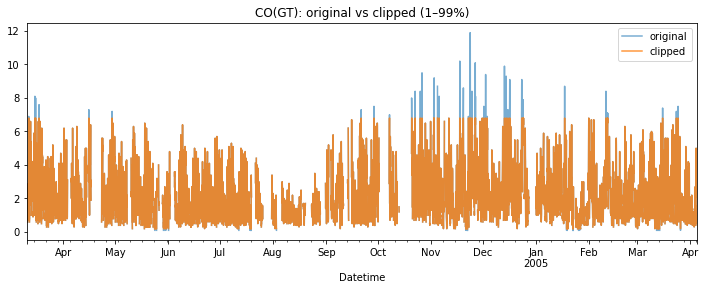

In [192]:
# === 3. Winsorization (1st–99th percentile) ===
low, high = df_interp[target].quantile([0.01, 0.99])
df_sanit = df_interp.copy()
df_sanit[target] = df_sanit[target].clip(lower=low, upper=high)

# Compare pre/post
df_interp[target].plot(figsize=(12, 4), alpha=0.6)
df_sanit[target].plot(alpha=0.8)
plt.title(f'{target}: original vs clipped (1–99%)')
plt.legend(['original', 'clipped'])
plt.show()

ADF stat: -9.516, p-value: 0.000


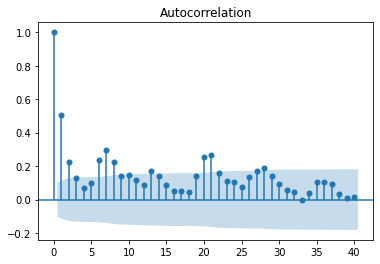

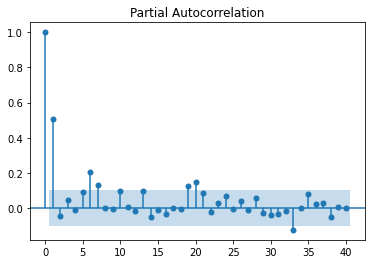

In [193]:
# === 4. Stationarity check ===
series = df_sanit[target].dropna()
adf = adfuller(series, autolag='AIC')
print(f'ADF stat: {adf[0]:.3f}, p-value: {adf[1]:.3f}')

# ACF/PACF (daily mean)
series_d = df_daily[target].dropna()
plot_acf(series_d, lags=40)
plt.show()
plot_pacf(series_d, lags=40)
plt.show()


In [194]:
# === 5. Train/validation split ===
cut = int(len(series) * 0.8)
train, test = series.iloc[:cut], series.iloc[cut:]

# === 6. Naive forecasts ===
def mae(a, b):
    return np.mean(np.abs(a - b))

def mape(a, b):
    mask = a != 0
    return np.mean(np.abs((a[mask] - b[mask]) / a[mask])) * 100

# Naive
yhat_naive = pd.Series(train.iloc[-1], index=test.index)

In [195]:
# Naive
yhat_naive = pd.Series(train.iloc[-1], index=test.index)

# Seasonal naive (daily seasonality for hourly data)
seasonal_period = 24
yhat_snaive = series.shift(seasonal_period).iloc[cut:]
yhat_snaive = yhat_snaive.dropna()
test_snaive = test.loc[yhat_snaive.index]  # Align

print("Naive  MAE:", mae(test, yhat_naive))
print("Naive  MAPE:", mape(test, yhat_naive))
print("SNaive MAE:", mae(test_snaive, yhat_snaive))
print("SNaive MAPE:", mape(test_snaive, yhat_snaive))

Naive  MAE: 1.6058631921824098
Naive  MAPE: 70.4647607907516
SNaive MAE: 0.8351791530944638
SNaive MAPE: 55.15162262100345


SARIMA MAE: 1.0160508718468437
SARIMA MAPE: 82.97543318395758


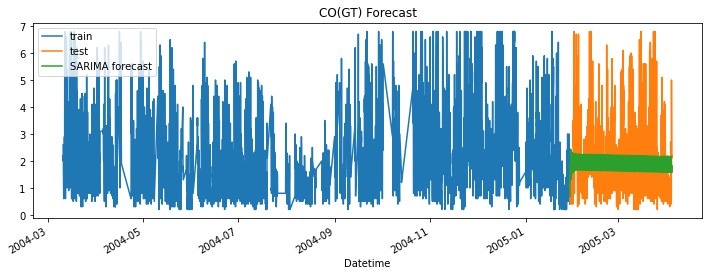

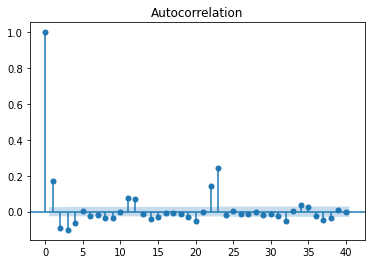

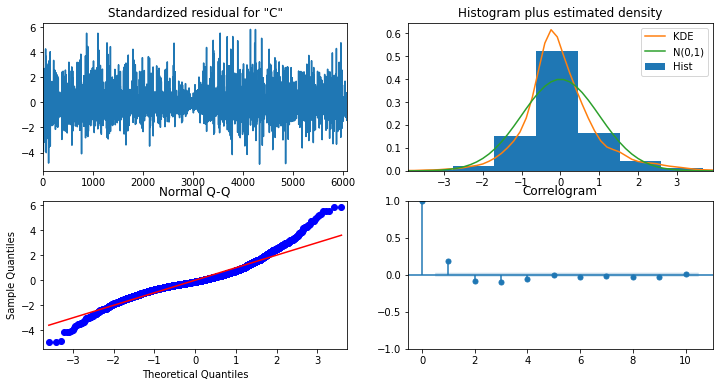

In [196]:
# === 7. SARIMA model ===
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 24)

model = SARIMAX(train,
                order=order,
                seasonal_order=seasonal_order,
                enforce_stationarity=False,
                enforce_invertibility=False)
res = model.fit(disp=False)

# ======= FIXED BLOCK FOR SARIMAX PREDICTION =======
# Avoid KeyError by predicting using integer positions
start = 0                   # Start at beginning of test set
end = len(test) - 1         # End at last index of test set

# .predict() expects positions relative to training, so add training length
pred = res.predict(start=len(train), end=len(train)+len(test)-1)
pred = pd.Series(pred.values, index=test.index)    # Align with test set index

print("SARIMA MAE:", mae(test, pred))
print("SARIMA MAPE:", mape(test, pred))

# Plot forecast vs actual
plt.figure(figsize=(12, 4))
train.plot(label='train')
test.plot(label='test')
pred.plot(label='SARIMA forecast')
plt.title(f'{target} Forecast')
plt.legend()
plt.show()

# === 8. Residual diagnostics ===
residuals = res.resid
plot_acf(residuals.dropna(), lags=40)
plt.show()

res.plot_diagnostics(figsize=(12, 6))
plt.show()


In [219]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import xgboost as xgb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Assume your DataFrame is called df, with datetime index and columns as listed
target_col = 'CO(GT)'

# === Prepare data: create lagged features for target and keep exogenous features ===
def create_features(df, target_col, n_lags=24):
    df = df.copy()
    
    # Create lag features for target variable
    for lag in range(1, n_lags+1):
        df[f'{target_col}_lag_{lag}'] = df[target_col].shift(lag)
    
    # Drop rows with NaN due to lagging
    df.dropna(inplace=True)
    
    # Define features (lagged target + other columns except target)
    feature_cols = [f'{target_col}_lag_{lag}' for lag in range(1, n_lags+1)] + \
                   [col for col in df.columns if col != target_col and not col.startswith(f'{target_col}_lag_')]
    
    return df, feature_cols

n_lags = 24
df_features, feature_cols = create_features(df, target_col, n_lags)

# Define X and y
X = df_features[feature_cols]
y = df_features[target_col]

# === Train-test split (80/20) ===
cut = int(len(df_features) * 0.8)
X_train, X_test = X.iloc[:cut], X.iloc[cut:]
y_train, y_test = y.iloc[:cut], y.iloc[cut:]

# ------------------ RandomForest ------------------
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
pred_rf = rf_model.predict(X_test)
print("RandomForest MAE:", mean_absolute_error(y_test, pred_rf))

# ------------------ XGBoost ------------------
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)
pred_xgb = xgb_model.predict(X_test)
print("XGBoost MAE:", mean_absolute_error(y_test, pred_xgb))

# ------------------ LSTM ------------------
# Scale features and target for LSTM
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1,1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1,1))

# Reshape input to 3D for LSTM: [samples, timesteps=1, features]
X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

import tensorflow as tf

lstm_model = Sequential([
    LSTM(50, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mae')
lstm_model.fit(X_train_lstm, y_train_scaled, epochs=100, batch_size=32, verbose=1)

pred_lstm_scaled = lstm_model.predict(X_test_lstm)
pred_lstm = scaler_y.inverse_transform(pred_lstm_scaled)

print("LSTM MAE:", mean_absolute_error(y_test, pred_lstm.flatten()))



RandomForest MAE: 0.2964807692307691
XGBoost MAE: 0.32795393432562164
Epoch 1/100
7/7 [==============================] - 2s 3ms/step - loss: 0.2797
Epoch 2/100
7/7 [==============================] - 0s 2ms/step - loss: 0.1295
Epoch 3/100
7/7 [==============================] - 0s 2ms/step - loss: 0.1149
Epoch 4/100
7/7 [==============================] - 0s 3ms/step - loss: 0.1018
Epoch 5/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0806
Epoch 6/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0659
Epoch 7/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0548
Epoch 8/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0496
Epoch 9/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0374
Epoch 10/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0343
Epoch 11/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0328
Epoch 12/100
7/7 [==============================] - 0s 2ms/step - loss

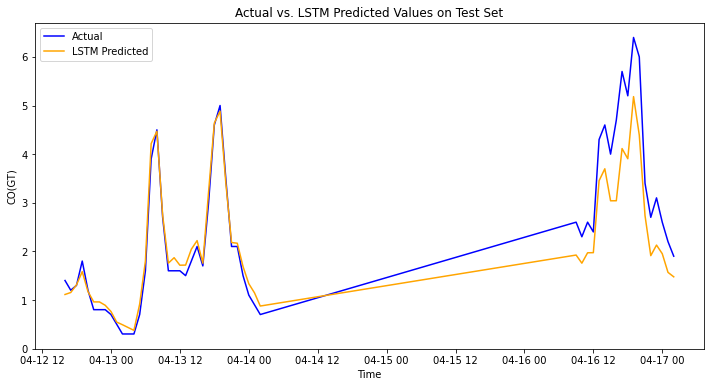

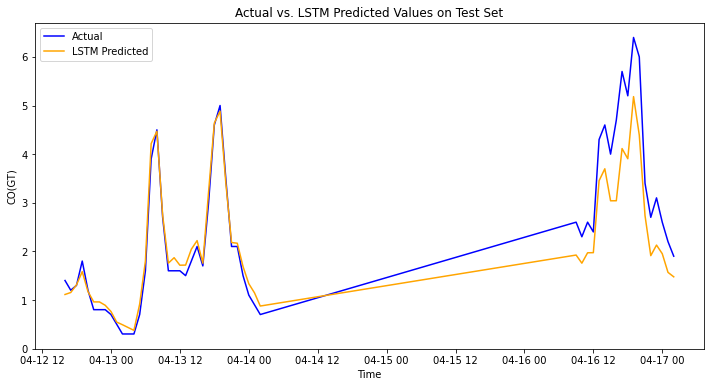

In [220]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test.values, label="Actual", color='blue')
plt.plot(y_test.index, pred_lstm.flatten(), label="LSTM Predicted", color='orange')
plt.title('Actual vs. LSTM Predicted Values on Test Set')
plt.xlabel('Time')
plt.ylabel(target_col)
plt.legend()
plt.show()


plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test.values, label="Actual", color='blue')
plt.plot(y_test.index, pred_lstm.flatten(), label="LSTM Predicted", color='orange')
plt.title('Actual vs. LSTM Predicted Values on Test Set')
plt.xlabel('Time')
plt.ylabel(target_col)
plt.legend()
plt.show()


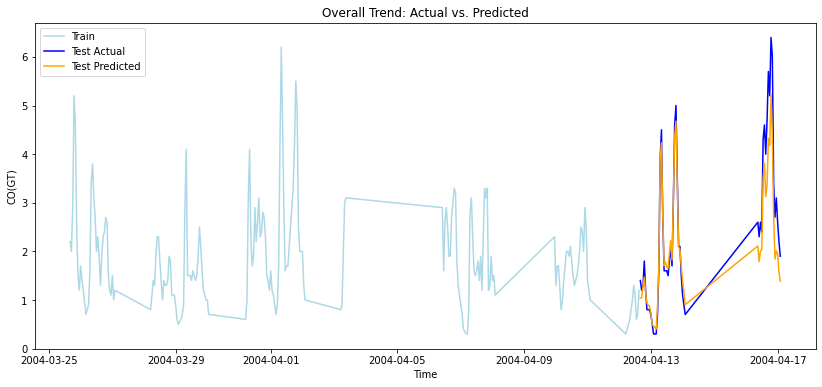

In [211]:
plt.figure(figsize=(14, 6))
plt.plot(y_train.index, y_train.values, label="Train", color='lightblue')
plt.plot(y_test.index, y_test.values, label="Test Actual", color='blue')
plt.plot(y_test.index, pred_lstm.flatten(), label="Test Predicted", color='orange')
plt.title('Overall Trend: Actual vs. Predicted')
plt.xlabel('Time')
plt.ylabel(target_col)
plt.legend()
plt.show()


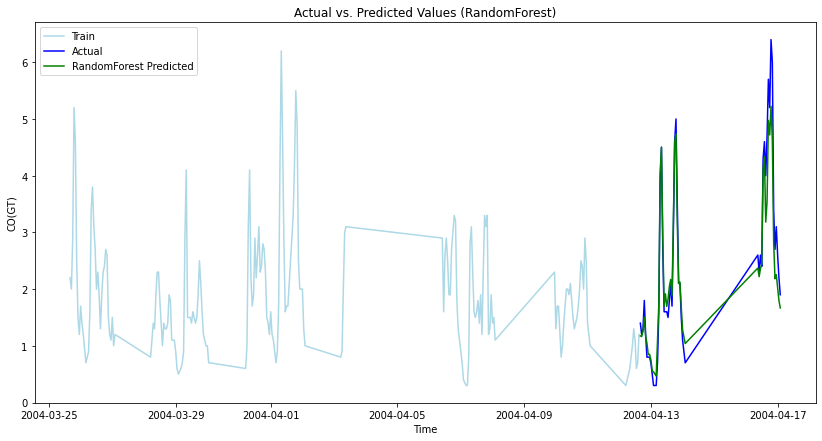

In [214]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(y_train.index, y_train.values, label="Train", color='lightblue')
plt.plot(y_test.index, y_test.values, label="Actual", color='blue')
plt.plot(y_test.index, pred_rf, label="RandomForest Predicted", color='green')

plt.title('Actual vs. Predicted Values (RandomForest)')
plt.xlabel('Time')
plt.ylabel(target_col)
plt.legend()
plt.show()


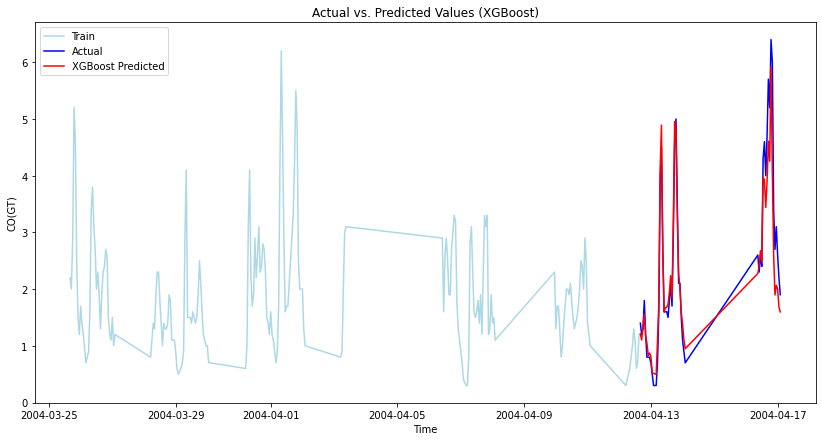

In [215]:
plt.figure(figsize=(14, 7))
plt.plot(y_train.index, y_train.values, label="Train", color='lightblue')
plt.plot(y_test.index, y_test.values, label="Actual", color='blue')
plt.plot(y_test.index, pred_xgb, label="XGBoost Predicted", color='red')

plt.title('Actual vs. Predicted Values (XGBoost)')
plt.xlabel('Time')
plt.ylabel(target_col)
plt.legend()
plt.show()